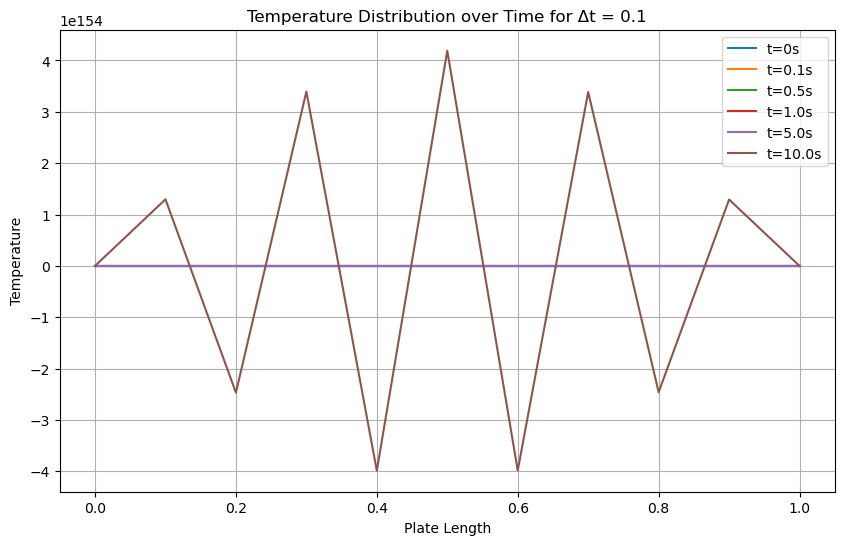

C:\Users\sayit\AppData\Local\Temp\ipykernel_15836\1876218307.py:23: RuntimeWarning: overflow encountered in scalar add
  T_new[i] = T[i] * (1 - 2 * (dt/(dx**2))) + (dt/(dx**2)) * (T[i + 1] + T[i - 1])


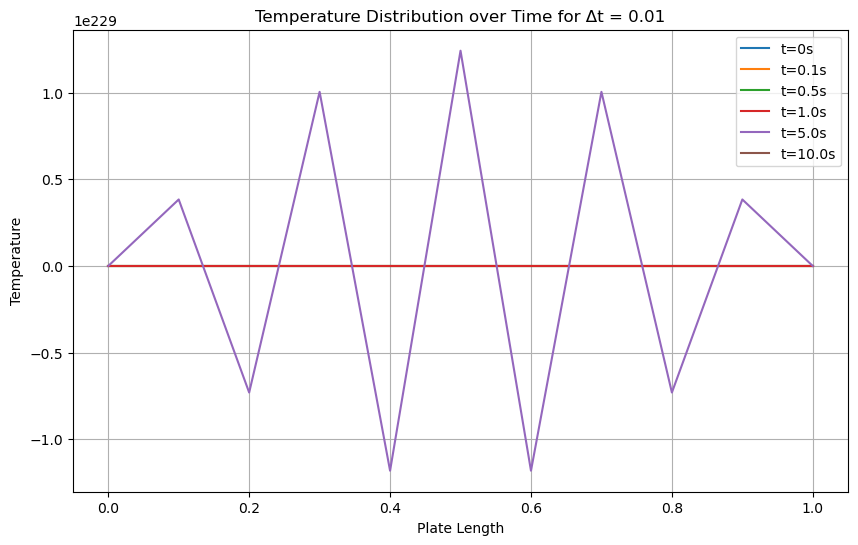

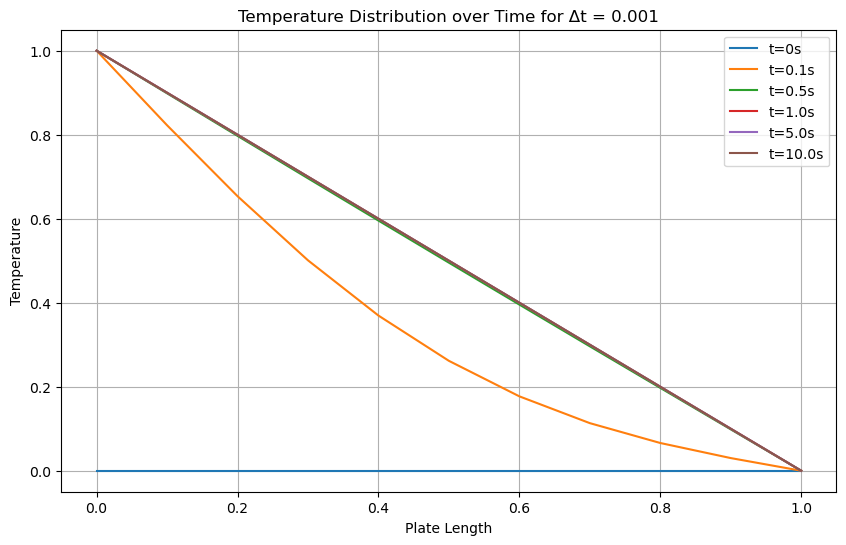

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
L = 1.0  # Length of the plate
alpha = 1.0  # Thermal diffusivity
num_points = 11  # Number of grid points
dx = L / (num_points - 1)  # Grid spacing
end_time = 10.0  # End time
timesteps = [0.1, 0.01, 0.001]  # List of time steps

# Function to solve the heat equation using finite difference method
def solve_heat_equation(dt):
    num_timesteps = int(end_time / dt)
    T = np.zeros(num_points)
    T_new = np.zeros(num_points)
    plt.plot(np.linspace(0, L, num_points), T, label=f"t={0}s")
    for t in range(1, num_timesteps + 1):
        # Boundary conditions
        T_new[0] = 1.0
        T_new[10] = 0.0
        for i in range(1, 10):
            T_new[i] = T[i] * (1 - 2 * (dt/(dx**2))) + (dt/(dx**2)) * (T[i + 1] + T[i - 1])
        # Update temperature for next timestep
        T = T_new
        T_new = np.zeros(num_points)
        if t*dt in [0.1, 0.5, 1.0, 5.0, 10.0]:
            plt.plot(np.linspace(0, L, num_points), T, label=f"t={t*dt}s")
#Plotting
for dt in timesteps:
    plt.figure(figsize=(10, 6))
    solve_heat_equation(dt)
    plt.xlabel('Plate Length')
    plt.ylabel('Temperature')
    plt.title(f"Temperature Distribution over Time for Δt = {dt}")
    plt.legend()
    plt.grid(True)
    plt.show()
